# 자원 최적화

## 라이브러리 호출 및 데이터 확인

In [121]:
# 라이브러리 호출
import random
from numpy.random import randint
from numpy.random import rand
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import mip
import pycaret
from pycaret.regression import *

In [122]:
df_m = pd.read_csv('./data/공정 데이터 2022년 8월.csv')
df_p1 = pd.read_csv('./data/프레스 1호-유압모터 전류데이터.csv', index_col=0)
df_p2 = pd.read_csv('./data/프레스 2호-유압모터 전류데이터.csv', index_col=0)
df_p3 = pd.read_csv('./data/프레스 3호-유압모터 전류데이터.csv', index_col=0)
df_p4 = pd.read_csv('./data/프레스 4호-유압모터 전류데이터.csv', index_col=0)
df_r1 = pd.read_csv('./data/로봇 1호-전류 데이터.csv', index_col=0)
df_r2 = pd.read_csv('./data/로봇 2호-전류 데이터.csv', index_col=0)

In [123]:
df_m

,idx,lineno,itemno,Order_date,day_night_type,product_date,quantity,cnt
0,55644626,1200,76211-A3010-100,44783,1,2022-08-10 7:57,5,18133963
1,55644630,1200,76211-A3010-100,44783,1,2022-08-10 7:58,2,18133965
2,55644633,1200,76211-A3010-100,44783,1,2022-08-10 7:59,3,18133968
3,55644635,1200,76211-A3010-100,44783,1,2022-08-10 7:59,3,18133971
4,55644642,1200,76211-A3010-100,44783,1,2022-08-10 8:00,3,18133974
...,...,...,...,...,...,...,...,...
55002,55774822,1200,77221-G6000-100,44804,1,2022-08-31 23:52,1,18246902
55003,55774825,1200,77211-G6000-100,44804,1,2022-08-31 23:52,2,18246904
55004,55774826,1200,77221-G6000-100,44804,1,2022-08-31 23:52,2,18246904
55005,55774827,1200,77211-G6000-100,44804,1,2022-08-31 23:52,1,18246905


In [124]:
# 필요없는 컬럼 삭제
df_m = df_m.drop(['idx', 'lineno', 'Order_date', 'cnt', 'day_night_type'], axis=1)
df_m

,itemno,product_date,quantity
0,76211-A3010-100,2022-08-10 7:57,5
1,76211-A3010-100,2022-08-10 7:58,2
2,76211-A3010-100,2022-08-10 7:59,3
3,76211-A3010-100,2022-08-10 7:59,3
4,76211-A3010-100,2022-08-10 8:00,3
...,...,...,...
55002,77221-G6000-100,2022-08-31 23:52,1
55003,77211-G6000-100,2022-08-31 23:52,2
55004,77221-G6000-100,2022-08-31 23:52,2
55005,77211-G6000-100,2022-08-31 23:52,1


In [125]:
display(df_m.info(), df_m)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55007 entries, 0 to 55006
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   itemno        55007 non-null  object
 1   product_date  55007 non-null  object
 2   quantity      55007 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


None

,itemno,product_date,quantity
0,76211-A3010-100,2022-08-10 7:57,5
1,76211-A3010-100,2022-08-10 7:58,2
2,76211-A3010-100,2022-08-10 7:59,3
3,76211-A3010-100,2022-08-10 7:59,3
4,76211-A3010-100,2022-08-10 8:00,3
...,...,...,...
55002,77221-G6000-100,2022-08-31 23:52,1
55003,77211-G6000-100,2022-08-31 23:52,2
55004,77221-G6000-100,2022-08-31 23:52,2
55005,77211-G6000-100,2022-08-31 23:52,1


In [126]:
# itemno(품목)의 unique 값 및 개수 확인
df_m['itemno'].unique(), len(df_m['itemno'].unique())

(array(['76211-A3010-100', '73721-G6000-100', '77111-G6000-100',
        '77121-G6000-100', '76111-G6000-100', '76121-G6000-100',
        '76211-G6000-100', '73711-G6000-100', '77111-A3000-100',
        '77211-A3010-100', '66411-AT000-100', '66421-AT000-100',
        '77211-G6000-100', '77221-G6000-100', '72811-DB000-100',
        '76121-G6010-100', '76111-G6010-100', '77221-A3010-100',
        '77221-A3000-100', '76121-A3000-100', '76211-A3000-100',
        '77111-G6010-100', '77121-G6010-100', '76111-A3000-100',
        '76221-A3000-100', '76221-A3010-100', '77121-A3000-100',
        '66411-G5000-100', '72821-DB000-100', '66421-G5000-100',
        '66411-J6000-100', '65514-M6200-100', '64312-Q4000-100',
        '66311-G5500-100', '73711-G5000-100', '73721-G5000-100'],
       dtype=object),
 36)

In [127]:
display(df_p1.info(), df_p1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32534 entries, 1 to 32534
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_s[s]  32534 non-null  object 
 1   RMS[A]     32534 non-null  float64
dtypes: float64(1), object(1)
memory usage: 762.5+ KB


None

,Time_s[s],RMS[A]
1,2022-07-17 12:09,3.790000e-15
2,2022-07-17 12:11,3.790000e-15
3,2022-07-17 12:12,3.790000e-15
4,2022-07-17 12:14,3.790000e-15
5,2022-07-17 12:18,3.790000e-15
...,...,...
32530,2022-08-31 23:48,5.933426e+00
32531,2022-08-31 23:50,5.944377e+00
32532,2022-08-31 23:53,5.934289e+00
32533,2022-08-31 23:57,5.952571e+00


In [128]:
display(df_p2.info(), df_p2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32452 entries, 1 to 32452
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time_s[s]        32452 non-null  object 
 1   Acceleration[g]  32452 non-null  float64
dtypes: float64(1), object(1)
memory usage: 760.6+ KB


None

,Time_s[s],Acceleration[g]
1,2022-07-17 12:10,0.007594
2,2022-07-17 12:12,0.007906
3,2022-07-17 12:13,0.008337
4,2022-07-17 12:15,0.007794
5,2022-07-17 12:16,0.008040
...,...,...
32448,2022-08-31 23:51,5.453872
32449,2022-08-31 23:52,5.466655
32450,2022-08-31 23:55,5.446658
32451,2022-08-31 23:56,5.458035


In [129]:
display(df_p3.info(), df_p3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29593 entries, 1 to 29593
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_s[s]  29593 non-null  object 
 1   RMS[A]     29593 non-null  float64
dtypes: float64(1), object(1)
memory usage: 693.6+ KB


None

,Time_s[s],RMS[A]
1,2022-07-17 12:14,0.007285
2,2022-07-17 12:15,0.007853
3,2022-07-17 12:17,0.007924
4,2022-07-17 12:18,0.007517
5,2022-07-17 12:20,0.006996
...,...,...
29589,2022-08-31 23:52,0.004963
29590,2022-08-31 23:53,0.004706
29591,2022-08-31 23:55,0.004674
29592,2022-08-31 23:57,0.004385


In [130]:
display(df_p4.info(), df_p4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29516 entries, 1 to 29516
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_s[s]  29516 non-null  object 
 1   RMS[A]     29516 non-null  float64
dtypes: float64(1), object(1)
memory usage: 691.8+ KB


None

,Time_s[s],RMS[A]
1,2022-07-17 12:15,3.790000e-15
2,2022-07-17 12:17,3.790000e-15
3,2022-07-17 12:19,3.790000e-15
4,2022-07-17 12:23,3.790000e-15
5,2022-07-17 15:42,2.254556e-02
...,...,...
29512,2022-08-31 23:53,4.562604e-03
29513,2022-08-31 23:54,4.171928e-03
29514,2022-08-31 23:56,4.132707e-03
29515,2022-08-31 23:57,4.309568e-03


In [131]:
display(df_r1.info(), df_r1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8219 entries, 1 to 8219
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_s[s]  8219 non-null   object 
 1   RMS[A]     8219 non-null   float64
dtypes: float64(1), object(1)
memory usage: 192.6+ KB


None

,Time_s[s],RMS[A]
1,2022-07-17 0:01,1.971988
2,2022-07-17 0:06,1.959803
3,2022-07-17 0:07,1.960802
4,2022-07-17 0:12,1.960694
5,2022-07-17 0:14,1.962618
...,...,...
8215,2022-08-31 22:52,1.687518
8216,2022-08-31 23:01,3.947365
8217,2022-08-31 23:07,1.573944
8218,2022-08-31 23:14,11.512992


In [132]:
display(df_r2.info(), df_r2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6545 entries, 1 to 6545
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time_s[s]  6545 non-null   object 
 1   RMS[A]     6545 non-null   float64
dtypes: float64(1), object(1)
memory usage: 153.4+ KB


None

,Time_s[s],RMS[A]
1,2022-07-17 0:01,1.624307
2,2022-07-17 0:06,1.618839
3,2022-07-17 0:13,1.619826
4,2022-07-17 0:24,1.610211
5,2022-07-17 0:30,1.624192
...,...,...
6541,2022-08-31 23:03,1.755417
6542,2022-08-31 23:14,11.976645
6543,2022-08-31 23:28,12.259376
6544,2022-08-31 23:40,2.344283


In [133]:
# 데이터 분포 확인
pd.concat([df_p1.describe(), df_p2.describe(), df_p3.describe(), df_p4.describe(), df_r1.describe(), df_r2.describe()], axis = 1)

,RMS[A],Acceleration[g],RMS[A],RMS[A],RMS[A],RMS[A]
count,3.253400e+04,32452.000000,29593.000000,2.951600e+04,8219.000000,6545.000000
mean,3.283625e+00,2.997782,0.090171,1.092007e-01,8.226586,7.232698
std,2.965904e+00,2.705924,1.446477,1.605324e+00,8.883872,7.137754
min,3.790000e-15,0.003609,0.003458,3.790000e-15,0.727902,0.885310
25%,4.556567e-03,0.005519,0.004249,4.121954e-03,2.062136,1.731107
50%,5.868303e+00,5.328890,0.004443,4.309151e-03,2.568512,2.078341
75%,5.925775e+00,5.429075,0.004707,4.577552e-03,13.176927,12.170405
max,4.419983e+01,36.025730,48.059628,4.846692e+01,45.223701,33.753895


In [134]:
# iteminfo -> 번호로 변경

uq_list = df_m['itemno'].unique()
item_dic = {}

for idx, no in enumerate(uq_list):
    item_dic[no] = idx

df_m['itemno'] = df_m['itemno'].map(item_dic)
df_m

,itemno,product_date,quantity
0,0,2022-08-10 7:57,5
1,0,2022-08-10 7:58,2
2,0,2022-08-10 7:59,3
3,0,2022-08-10 7:59,3
4,0,2022-08-10 8:00,3
...,...,...,...
55002,13,2022-08-31 23:52,1
55003,12,2022-08-31 23:52,2
55004,13,2022-08-31 23:52,2
55005,12,2022-08-31 23:52,1


In [135]:
df_m['itemno'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [136]:
# 컬럼 이름 통일

df_m = df_m.rename(columns={'product_date': 'times', 'quantity':'qty'})
df_p1 = df_p1.rename(columns={'Time_s[s]': 'times', 'RMS[A]':'amp_1'})
df_p2 = df_p2.rename(columns={'Time_s[s]': 'times', 'Acceleration[g]':'amp_2'})
df_p3 = df_p3.rename(columns={'Time_s[s]': 'times', 'RMS[A]':'amp_3'})
df_p4 = df_p4.rename(columns={'Time_s[s]': 'times', 'RMS[A]':'amp_4'})
df_r1 = df_r1.rename(columns={'Time_s[s]': 'times', 'RMS[A]':'amp_5'})
df_r2 = df_r2.rename(columns={'Time_s[s]': 'times', 'RMS[A]':'amp_6'})

In [137]:
# 데이터 타입 변경 및 공통기간 데이터 선택

# 1. date time 타입 수정
df_list = [df_m, df_p1, df_p2, df_p3, df_p4, df_r1, df_r2]

for df in df_list:
    df['times'] = pd.to_datetime(df['times'])

# 2. 2022-08-11 ~ 2022-08-31 까지의 데이터만 선택

df_m = df_m[(df_m['times'] >= '2022-08-11 00:00:00') & (df_m['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_p1 = df_p1[(df_p1['times'] >= '2022-08-11 00:00:00') & (df_p1['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_p2 = df_p2[(df_p2['times'] >= '2022-08-11 00:00:00') & (df_p2['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_p3 = df_p3[(df_p3['times'] >= '2022-08-11 00:00:00') & (df_p3['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_p4 = df_p4[(df_p4['times'] >= '2022-08-11 00:00:00') & (df_p4['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_r1 = df_r1[(df_r1['times'] >= '2022-08-11 00:00:00') & (df_r1['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)
df_r2 = df_r2[(df_r2['times'] >= '2022-08-11 00:00:00') & (df_r2['times'] <= '2022-08-31 23:59:59')].reset_index(drop = True)

In [138]:
df_p1

,times,amp_1
0,2022-08-11 00:00:00,5.920062
1,2022-08-11 00:03:00,5.924090
2,2022-08-11 00:07:00,5.884381
3,2022-08-11 00:11:00,5.896043
4,2022-08-11 00:14:00,5.941872
...,...,...
15345,2022-08-31 23:48:00,5.933426
15346,2022-08-31 23:50:00,5.944377
15347,2022-08-31 23:53:00,5.934289
15348,2022-08-31 23:57:00,5.952571


## 데이터 이상치 처리

In [139]:
# 시각화 그릴 때 제목이나 축 이름 한글 깨짐 방지
path = "c:/windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
# 출력 할때 경고 메시지 숨기기
warnings.filterwarnings(action='ignore')

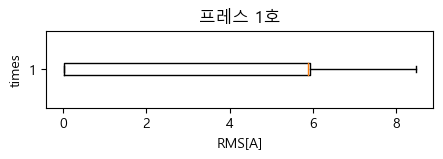

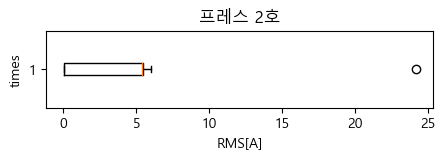

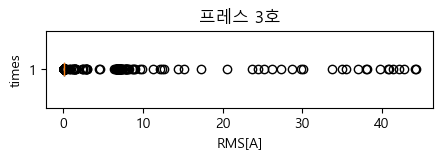

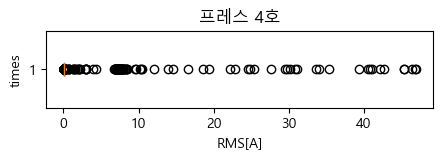

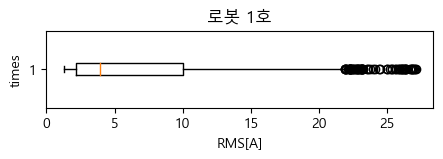

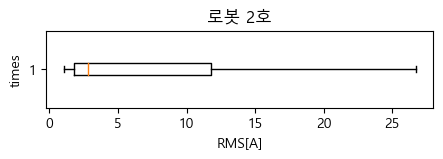

In [140]:
# df_p3, df_p4, df_r1 이상치 있음 확인

df_list = [df_p1, df_p2, df_p3, df_p4, df_r1, df_r2]
title_list = ['프레스 1호', '프레스 2호', '프레스 3호', '프레스 4호', '로봇 1호', '로봇 2호']
for df, title in zip(df_list, title_list):
    plt.figure(figsize=(5, 1))
    plt.title(title)
    plt.ylabel(df.columns[0])
    plt.xlabel('RMS[A]')

    plt.boxplot(df.dropna().iloc[:,1], vert = False)
    plt.show()

In [141]:
print("이상치 제거 전 :", len(df_p3), len(df_p4), len(df_r1))

이상치 제거 전 : 14239 14236 3357


In [142]:
# 이상치 제거 함수 생성

def remove_outlier(df, n):
    # 이상치 제거 반복 횟수
    for i in range(n):
        target = df.iloc[:,1]

        Q1 = df.iloc[:,1].quantile(0.25)
        Q3 = df.iloc[:,1].quantile(0.75)
        IQR = Q3 - Q1

        under = Q1 - (1.5*IQR)
        upper = Q3 + (1.5*IQR)

        df = df[(target >= under) & (target <= upper)]
    
    return df

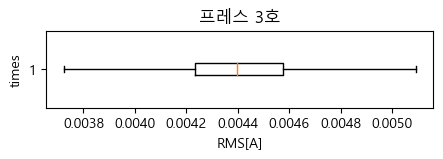

이상치 제거 전 : 14239
이상치 제거 후 : 12125
------------------------------


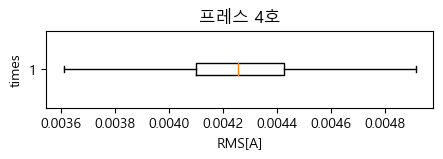

이상치 제거 전 : 14236
이상치 제거 후 : 11997
------------------------------


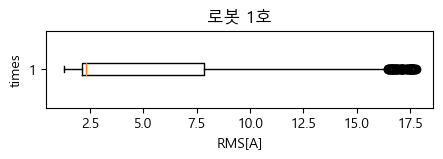

이상치 제거 전 : 3357
이상치 제거 후 : 3050
------------------------------


In [143]:
remove_lst = [df_p3, df_p4, df_r1]
title_list = ['프레스 3호', '프레스 4호', '로봇 1호']

for df, title in zip(remove_lst, title_list):
    before_len = len(df) # 이상치 제거 전 데이터 수 저장

    df = remove_outlier(df, 4)
    # 4회 반복이 가장 데이터 손실이 적고, 이상치 제거가 잘 된듯 보인다.
    
    plt.figure(figsize=(5, 1))
    plt.title(title)
    plt.ylabel(df.columns[0])
    plt.xlabel('RMS[A]')

    plt.boxplot(df.iloc[:,1], vert = False)
    plt.show()
    print("이상치 제거 전 :", before_len)
    print("이상치 제거 후 :", len(df))
    print('-' * 30)


In [144]:
df_p3 = remove_outlier(df_p3, 4)
df_p4 = remove_outlier(df_p4, 4)
df_r1 = remove_outlier(df_r1, 4)
df_r2 = remove_outlier(df_r2, 4)

In [145]:
# 1분단위의 시간으로 데이터 통일

df_list = [df_m, df_p1, df_p2, df_p3, df_p4, df_r1, df_r2]

# df_m 의 times, itemno 기준 groupby, 합계 산출
df_m = df_m.groupby(['times', 'itemno']).sum().reset_index()

print("전처리 이전")
for df in df_list:
    print(df.head(3))

# 1분단위로 값 생성 
df_m = df_m.set_index('times')
df_p1 = df_p1.set_index('times').resample('1T').median()
df_p2 = df_p2.set_index('times').resample('1T').median()
df_p3 = df_p3.set_index('times').resample('1T').median()
df_p4 = df_p4.set_index('times').resample('1T').median()
df_r1 = df_r1.set_index('times').resample('1T').median()
df_r2 = df_r2.set_index('times').resample('1T').median()
    
df_list = [df_m, df_p1, df_p2, df_p3, df_p4, df_r1, df_r2]
print()
print()
print("전처리 후")
for df in df_list:
    print(df.head(3))

전처리 이전
   itemno               times  qty
0       9 2022-08-11 00:03:00    1
1       9 2022-08-11 00:03:00    1
2       9 2022-08-11 00:03:00    1
                times     amp_1
0 2022-08-11 00:00:00  5.920062
1 2022-08-11 00:03:00  5.924090
2 2022-08-11 00:07:00  5.884381
                times     amp_2
0 2022-08-11 00:00:00  5.413774
1 2022-08-11 00:02:00  5.438412
2 2022-08-11 00:03:00  5.409565
                times     amp_3
0 2022-08-11 00:00:00  0.004669
1 2022-08-11 00:02:00  0.004920
2 2022-08-11 00:05:00  0.004546
                times     amp_4
0 2022-08-11 00:00:00  0.004447
3 2022-08-11 00:05:00  0.004864
4 2022-08-11 00:07:00  0.003873
                times      amp_5
0 2022-08-11 00:03:00   4.323400
1 2022-08-11 00:19:00   8.706882
2 2022-08-11 00:27:00  12.194757
                times      amp_6
0 2022-08-11 00:04:00  19.140257
1 2022-08-11 00:17:00  18.757881
2 2022-08-11 00:24:00  17.768850


전처리 후
                     itemno  qty
times                           
202

In [146]:
# 하나의 데이터프레임으로 병합

df_sensor = df_p1.join(df_p2, how='outer').join(df_p3, how='outer').join(df_p4, how='outer').join(df_r1, how='outer').join(df_r2, how='outer')
# df_sensor

df = df_m.join(df_sensor, how='left')
# df

# 결측값 0으로 대체
df = df.fillna(0)
df

,itemno,qty,amp_1,amp_2,amp_3,amp_4,amp_5,amp_6
times,,,,,,,,
2022-08-11 00:03:00,9,3,5.924090,5.409565,0.000000,0.000000,4.3234,0.000000
2022-08-11 00:04:00,9,5,0.000000,0.000000,0.000000,0.000000,0.0000,19.140257
2022-08-11 00:05:00,9,9,0.000000,0.000000,0.004546,0.004864,0.0000,0.000000
2022-08-11 00:06:00,9,6,0.000000,5.309373,0.004448,0.000000,0.0000,0.000000
2022-08-11 00:07:00,9,9,5.884381,0.000000,0.000000,0.003873,0.0000,0.000000
...,...,...,...,...,...,...,...,...
2022-08-31 23:29:00,13,2,5.941137,5.456436,0.004759,0.000000,0.0000,0.000000
2022-08-31 23:35:00,12,1,5.886790,5.457790,0.004859,0.000000,0.0000,0.000000
2022-08-31 23:35:00,13,1,5.886790,5.457790,0.004859,0.000000,0.0000,0.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16917 entries, 2022-08-11 00:03:00 to 2022-08-31 23:52:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   itemno  16917 non-null  int64  
 1   qty     16917 non-null  int64  
 2   amp_1   16917 non-null  float64
 3   amp_2   16917 non-null  float64
 4   amp_3   16917 non-null  float64
 5   amp_4   16917 non-null  float64
 6   amp_5   16917 non-null  float64
 7   amp_6   16917 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


In [148]:
df.describe()

,itemno,qty,amp_1,amp_2,amp_3,amp_4,amp_5,amp_6
count,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000,16917.000000
mean,11.446474,7.189100,3.037748,2.728354,0.001810,0.001700,0.863162,1.030189
std,8.818024,2.235593,2.967980,2.707263,0.002180,0.002093,2.914640,3.629776
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,8.000000,5.837677,5.267213,0.000000,0.000000,0.000000,0.000000
75%,14.000000,9.000000,5.919141,5.410431,0.004341,0.004181,0.000000,0.000000
max,35.000000,11.000000,6.544678,5.930254,0.005089,0.004915,17.761414,26.726574


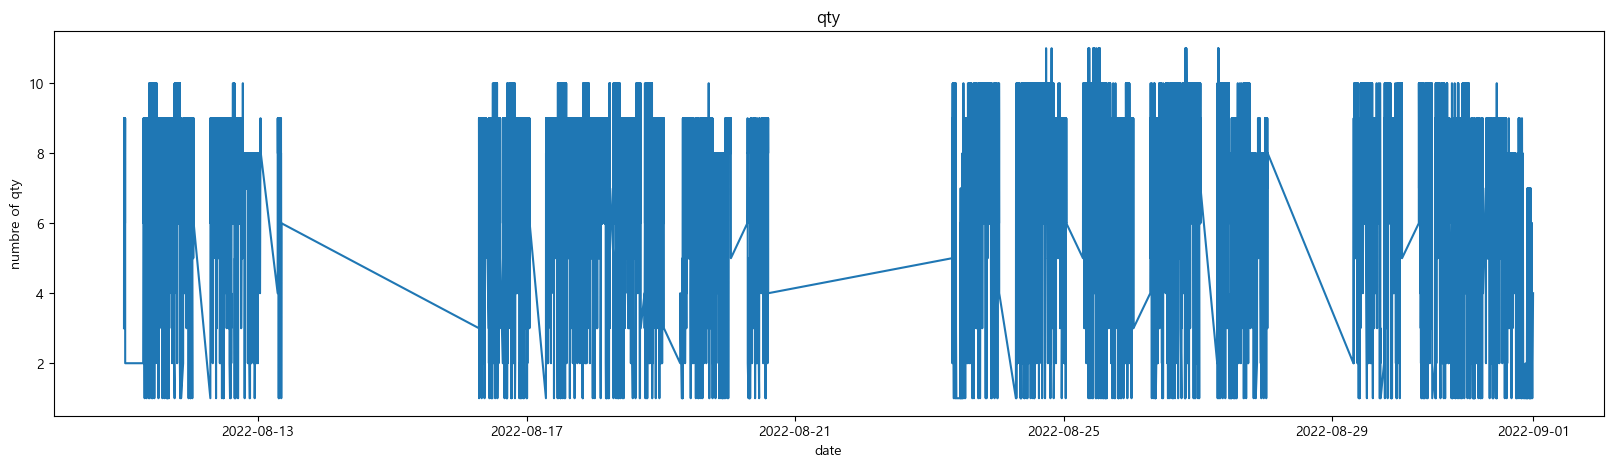

In [149]:
plt.figure(figsize=(20, 5))
plt.xlabel('date')
plt.ylabel('numbre of qty')
plt.title('qty')
plt.plot(df['qty'])
plt.show()

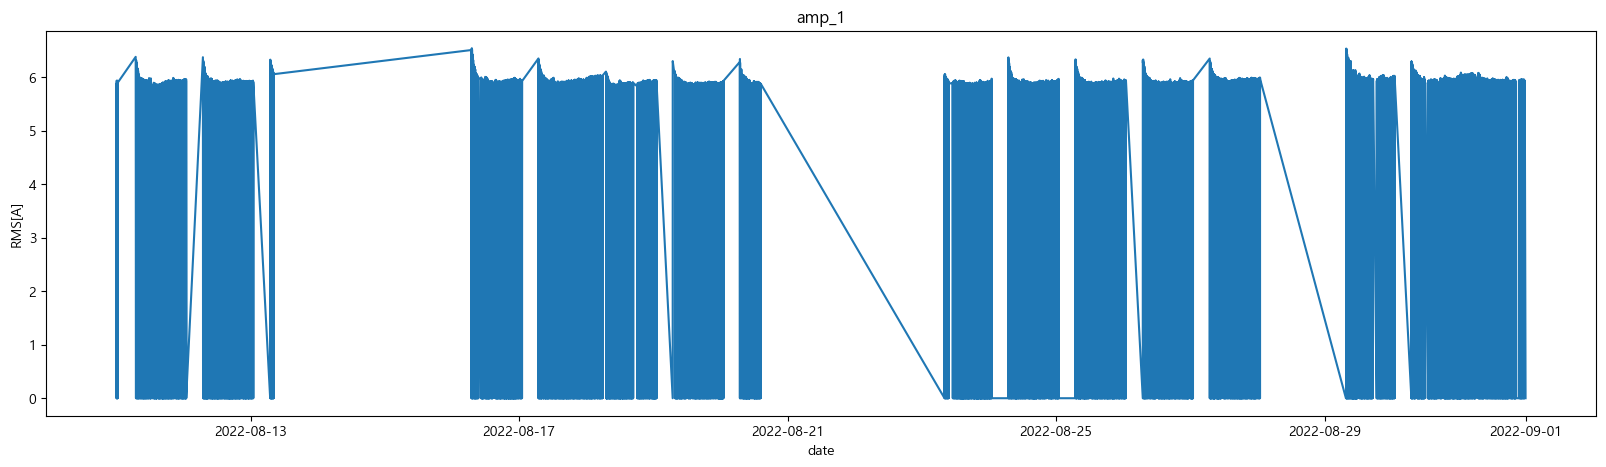

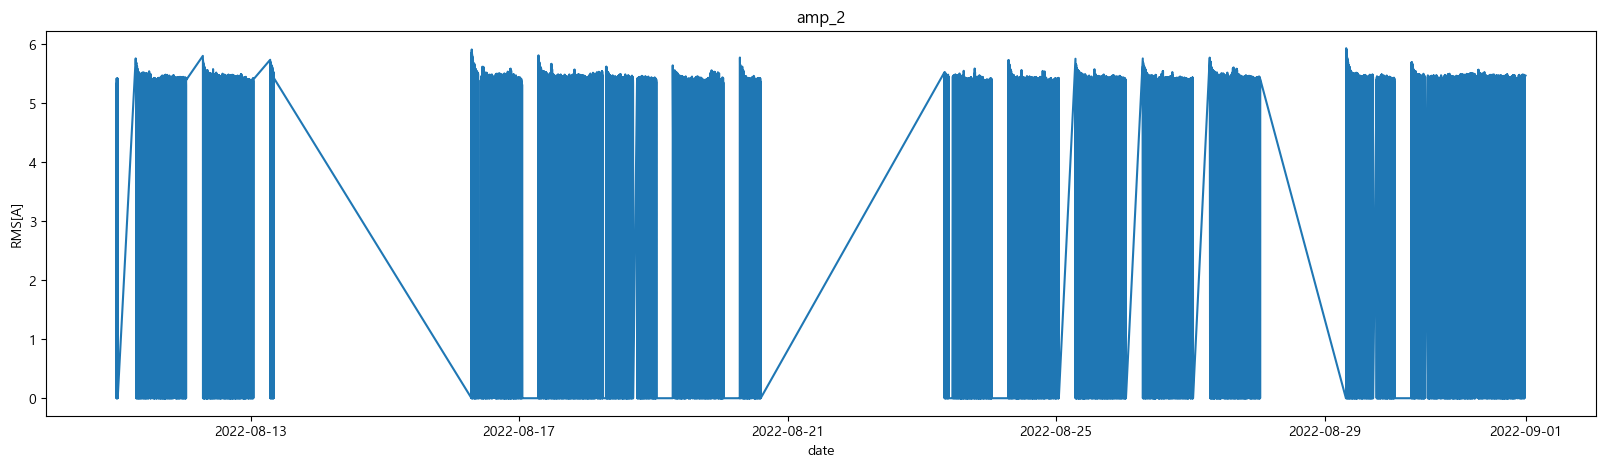

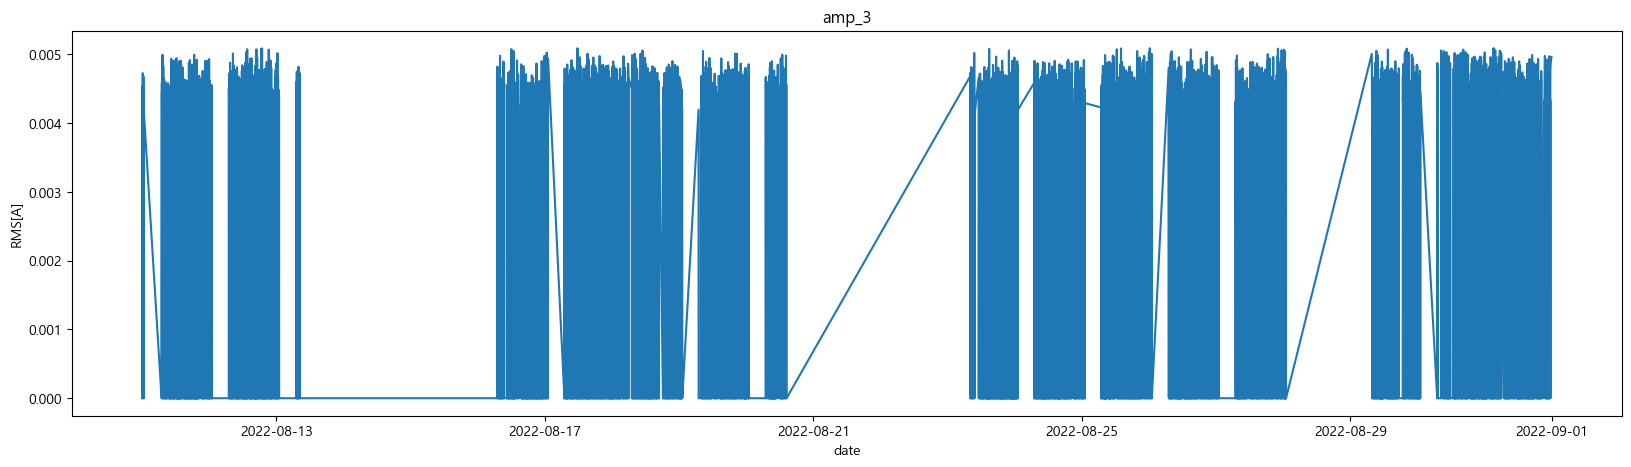

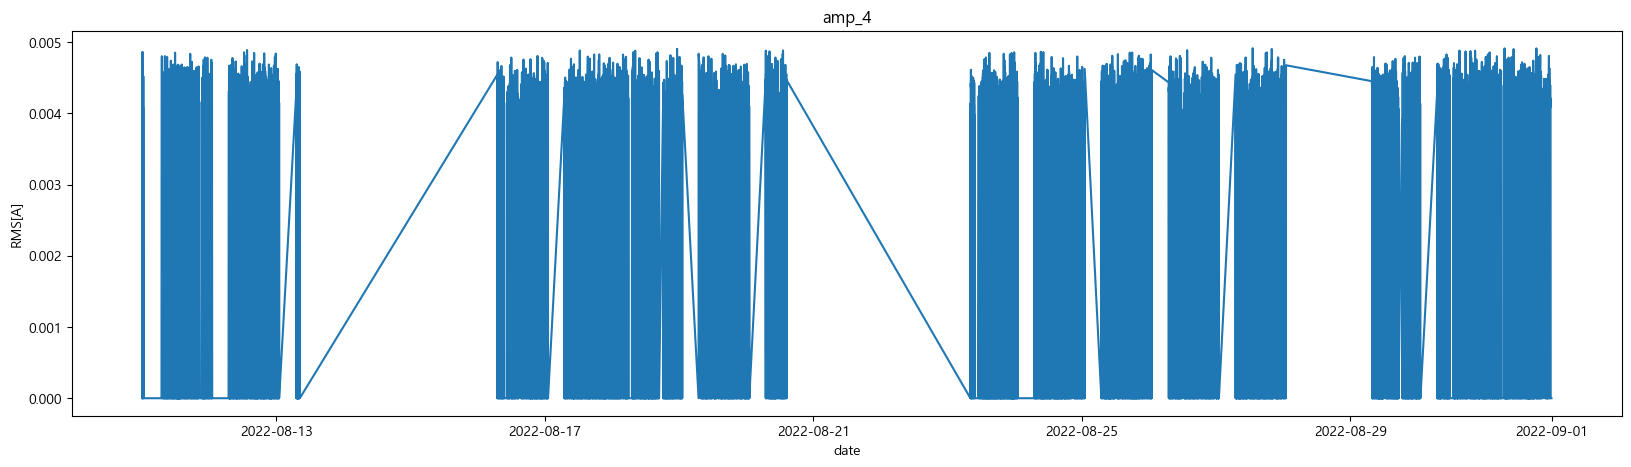

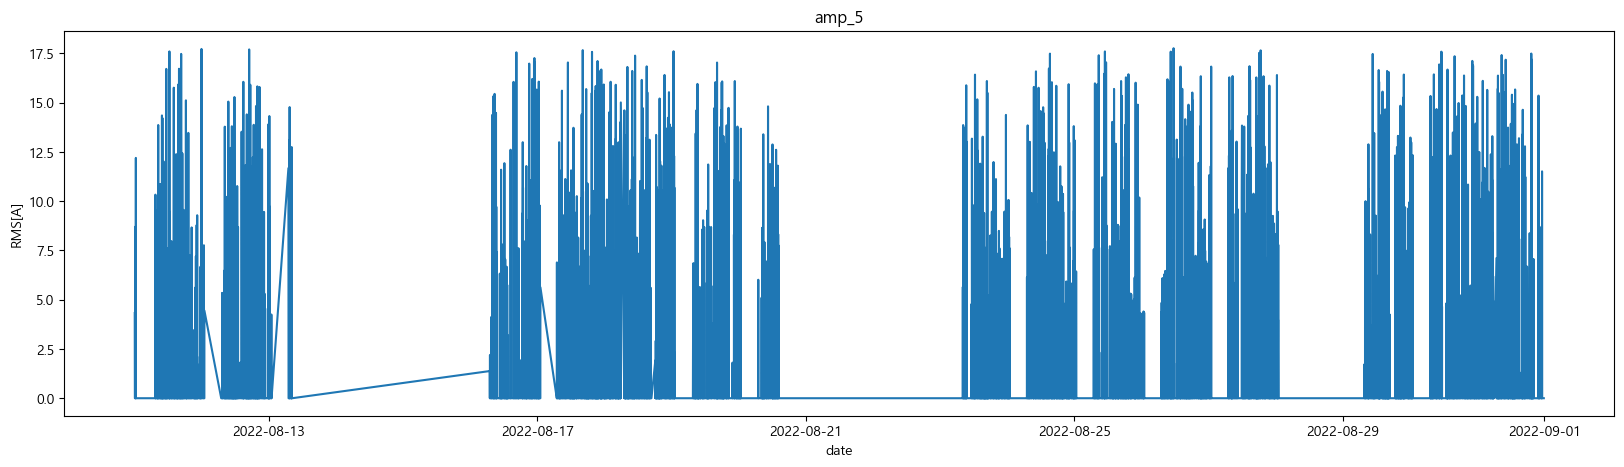

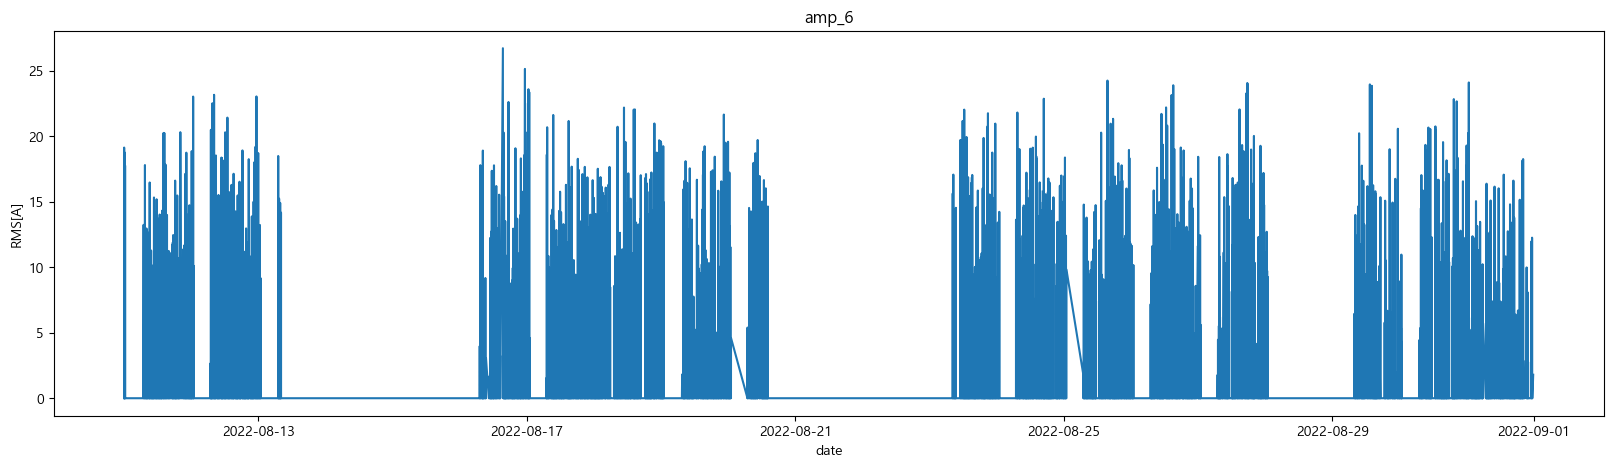

In [150]:
amp_list = ['amp_1', 'amp_2', 'amp_3', 'amp_4', 'amp_5', 'amp_6']
for amp in amp_list:
    plt.figure(figsize=(20, 5))
    plt.xlabel('date')
    plt.ylabel('RMS[A]')
    plt.title(amp)
    plt.plot(df[amp])
    plt.show()

In [151]:
df

,itemno,qty,amp_1,amp_2,amp_3,amp_4,amp_5,amp_6
times,,,,,,,,
2022-08-11 00:03:00,9,3,5.924090,5.409565,0.000000,0.000000,4.3234,0.000000
2022-08-11 00:04:00,9,5,0.000000,0.000000,0.000000,0.000000,0.0000,19.140257
2022-08-11 00:05:00,9,9,0.000000,0.000000,0.004546,0.004864,0.0000,0.000000
2022-08-11 00:06:00,9,6,0.000000,5.309373,0.004448,0.000000,0.0000,0.000000
2022-08-11 00:07:00,9,9,5.884381,0.000000,0.000000,0.003873,0.0000,0.000000
...,...,...,...,...,...,...,...,...
2022-08-31 23:29:00,13,2,5.941137,5.456436,0.004759,0.000000,0.0000,0.000000
2022-08-31 23:35:00,12,1,5.886790,5.457790,0.004859,0.000000,0.0000,0.000000
2022-08-31 23:35:00,13,1,5.886790,5.457790,0.004859,0.000000,0.0000,0.000000


In [152]:
amp ='amp_1'

import pycaret
from pycaret.regression import *

# pycaret을 작동시키기 위한 setup 설정
reg1 = setup(
df[['itemno', 'qty', amp]], # 예측에 사용 될 컬럼
target = amp, # target 컬럼 (전류 값) 
categorical_features=['itemno'], # 범주형 컬럼
numeric_features=['qty'], # 수치형 컬럼 
session_id=123, # random state 설정
experiment_name=f'{amp}_opt',
normalize = True, # 데이터 정규화
silent=True,
)

,Description,Value
0,session_id,123
1,Target,amp_1
2,Original Data,"(16917, 3)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(11841, 37)"


In [153]:
best_model = compare_models(include=['lr', 'rf', 'ada'], sort='MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,2.9688,8.8535,2.9755,-0.0065,1.0476,0.4943,0.0180
lr,Linear Regression,2.9699,8.8548,2.9757,-0.0066,1.0505,0.4890,0.3500
rf,Random Forest Regressor,2.9684,9.1231,3.0204,-0.0371,1.0565,0.4886,0.4690


In [154]:
tuned_best_model = tune_model(best_model)
tuned_best_model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.9653,8.7991,2.9663,-0.0023,1.0372,0.4938
1,2.9669,8.8073,2.9677,-0.0007,1.0396,0.4957
2,2.9709,8.8350,2.9724,-0.0098,1.0863,0.4879
3,2.9788,8.9158,2.9859,-0.0098,1.0461,0.4975
4,2.9649,8.8021,2.9668,0.0007,1.0476,0.4912
5,2.9715,8.8343,2.9723,-0.0010,1.0574,0.4989
6,2.9662,8.8025,2.9669,-0.0011,1.0375,0.4959
7,2.9666,8.8051,2.9673,-0.0010,1.0378,0.4954
8,2.9685,8.8256,2.9708,-0.0038,1.0362,0.4941
9,2.9654,8.7966,2.9659,-0.0007,1.0374,0.4979


AdaBoostRegressor(base_estimator=None, learning_rate=0.4, loss='square',
                  n_estimators=130, random_state=123)

In [155]:
save_model(tuned_best_model, model_name='./model/amp_1_best_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['itemno'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['qty'],
                                       target='amp_1', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nume...
                 ('dummy', Dummify(target='amp_1')),
                 ('fix_perfect', Remove_100(target='amp_1')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough

In [156]:
# 각각 저장됨
amp_list = ['amp_2', 'amp_3', 'amp_4', 'amp_5', 'amp_6']

for amp in amp_list:
    reg1 = setup(
        df[['itemno', 'qty', amp]],
        target=amp,
        categorical_features=['itemno'],
        numeric_features=['qty'],
        session_id=123,
        experiment_name=f'{amp}_best_model',
        normalize = True,
        silent=True
    )
    
    best_model = compare_models(include=['lr', 'rf', 'ada'], sort='MAE')
    
    tuned_best_model = tune_model(best_model)
    
    # 각각의 amp에 대한 모델을 저장
    save_model(tuned_best_model, model_name=f'./model/{amp}_best_model')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9670,14.5143,3.8098,0.0013,0.8768,0.8788
1,1.9662,15.2647,3.9070,-0.0054,0.8797,0.8671
2,1.7760,10.8467,3.2934,-0.0049,0.8524,0.8685
3,1.9389,13.6881,3.6997,0.0021,0.8708,0.8571
4,1.8577,12.4077,3.5225,-0.0041,0.8669,0.8685
5,1.8409,11.9988,3.4639,-0.0073,0.8648,0.8615
6,1.8413,12.6698,3.5595,-0.0067,0.8621,0.8540
7,1.9745,15.1477,3.8920,-0.0033,0.8796,0.8614
8,1.8453,12.1219,3.4817,0.0016,0.8610,0.8719
9,1.9247,13.9416,3.7338,-0.0022,0.8740,0.8809


Transformation Pipeline and Model Succesfully Saved


In [157]:
for amp in amp_list:
    print(f'./model/{amp}_best_model: ')
    loaded_bestmodel = load_model(f'./model/{amp}_best_model')
    print(loaded_bestmodel[-1])

./model/amp_2_best_model: 
Transformation Pipeline and Model Successfully Loaded
AdaBoostRegressor(base_estimator=None, learning_rate=0.3, loss='square',
                  n_estimators=220, random_state=123)
./model/amp_3_best_model: 
Transformation Pipeline and Model Successfully Loaded
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)
./model/amp_4_best_model: 
Transformation Pipeline and Model Successfully Loaded
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)
./model/amp_5_best_model: 
Transformation Pipeline and Model Successfully Loaded
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)
./model/amp_6_best_model: 
Transformation Pipeline and Model Successfully Loaded
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [158]:
from itertools import product
itemno_list = []
qty_list = []
machine_list = []

# itemno별, 1~99까지, amp1~6 총 21,384개(36*99*6) df 생성
guide_info_list = list(product(df.itemno.unique(), list(range(1,100)), ['amp_1','amp_2','amp_3','amp_4','amp_5','amp_6']))
for i in guide_info_list:
    itemno_list.append(i[0])
    qty_list.append(i[1])
    machine_list.append(i[2])
guide_info_df = pd.DataFrame(zip(itemno_list, qty_list, machine_list), columns=['itemno', 'qty', 'machine'])
guide_info_df['current'] =0 # 예측 될 값이 저장 될 'current'
guide_info_df

,itemno,qty,machine,current
0,9,1,amp_1,0
1,9,1,amp_2,0
2,9,1,amp_3,0
3,9,1,amp_4,0
4,9,1,amp_5,0
...,...,...,...,...
21379,35,99,amp_2,0
21380,35,99,amp_3,0
21381,35,99,amp_4,0
21382,35,99,amp_5,0


In [159]:
for amp in amp_list:
    loaded_bestmodel = load_model(f'./model/{amp}_best_model')
    amp_index= guide_info_df[guide_info_df['machine']==amp].index
    result = loaded_bestmodel.predict(guide_info_df.loc[amp_index, ('itemno', 'qty')])
    guide_info_df.loc[amp_index, ('current')] = result
guide_info_df.sort_values(by = ['itemno', 'qty', 'machine'], inplace = True)    
guide_info_df.to_csv('./model/guide_info_df.csv', index=False)
guide_info_df = pd.read_csv('./model/guide_info_df.csv')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [160]:
guide_info_df

,itemno,qty,machine,current
0,0,1,amp_1,0.000000
1,0,1,amp_2,2.723170
2,0,1,amp_3,0.001999
3,0,1,amp_4,0.001907
4,0,1,amp_5,1.374474
...,...,...,...,...
21379,35,99,amp_2,2.676702
21380,35,99,amp_3,0.004125
21381,35,99,amp_4,0.004776
21382,35,99,amp_5,4.798734


In [161]:
# 가상의 생산 요구서 작성
# 생산 가능 일 수
product_day =5

demand = {}
demand[1] =100
demand[2] =100
demand[3] =100
demand[4] =100
demand[5] =100
demand # 특정 itemno (i), 생산해야 하는 qty (q)

{1: 100, 2: 100, 3: 100, 4: 100, 5: 100}

In [162]:
# set
I = list(set(guide_info_df.itemno)) # 모든 item 이름 list
Q = list(set(guide_info_df.qty)) # 한 번에 생산 가능한 qty list
M = list(set(guide_info_df.machine)) # 생산 machine list
T = list(range(1, product_day+1)) # 1~5일
print(f'item list : {I}')
print(f'qty list : {Q}')
print(f'machine list : {M}')
print(f'time list : {T}')

item list : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
qty list : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
machine list : ['amp_4', 'amp_3', 'amp_2', 'amp_5', 'amp_6', 'amp_1']
time list : [1, 2, 3, 4, 5]


In [163]:
diq = {}
for itemno in I:
    if itemno in set(demand.keys()):
        diq[itemno] = demand[itemno]
    else:
        diq[itemno] =0
diq

{0: 0,
 1: 100,
 2: 100,
 3: 100,
 4: 100,
 5: 100,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0}

In [164]:
# ciqm : item, qty별 machine의 소비전력 예측값

ciqm = {} # 특정 itemno (i), 생산하는 qty (q), 생산 machine (m)에 대한 current dictionary
for index, info in guide_info_df.iterrows():
    ciqm[info['itemno'], info['qty'], info['machine']] = info['current']
ciqm

{(0, 1, 'amp_1'): 0.0,
 (0, 1, 'amp_2'): 2.7231700370994893,
 (0, 1, 'amp_3'): 0.0019985712133347,
 (0, 1, 'amp_4'): 0.0019073486328125,
 (0, 1, 'amp_5'): 1.374474287033081,
 (0, 1, 'amp_6'): 0.6807861328125,
 (0, 2, 'amp_1'): 0.0,
 (0, 2, 'amp_2'): 2.7231700370994893,
 (0, 2, 'amp_3'): 0.0020202675368636,
 (0, 2, 'amp_4'): 0.0019378662109375,
 (0, 2, 'amp_5'): 1.4094157218933103,
 (0, 2, 'amp_6'): 0.747802734375,
 (0, 3, 'amp_1'): 0.0,
 (0, 3, 'amp_2'): 2.7231700370994893,
 (0, 3, 'amp_3'): 0.0020419638603925,
 (0, 3, 'amp_4'): 0.0019683837890625,
 (0, 3, 'amp_5'): 1.44435715675354,
 (0, 3, 'amp_6'): 0.81494140625,
 (0, 4, 'amp_1'): 0.0,
 (0, 4, 'amp_2'): 2.7231700370994893,
 (0, 4, 'amp_3'): 0.0020636604167521,
 (0, 4, 'amp_4'): 0.0019989013671875,
 (0, 4, 'amp_5'): 1.4792985916137695,
 (0, 4, 'amp_6'): 0.8819580078125,
 (0, 5, 'amp_1'): 0.0,
 (0, 5, 'amp_2'): 2.8375036767289608,
 (0, 5, 'amp_3'): 0.0020853567402809,
 (0, 5, 'amp_4'): 0.0020294189453125,
 (0, 5, 'amp_5'): 1.514239907

In [165]:
## mip 사용 예시 ##


# import mip

# # 최적화 모델 생성
# model = mip.Model()

# # 이진 변수 생성
# x = model.add_var(var_type=mip.INTEGER, lb=0)  # 정수 변수 x
# y = model.add_var(var_type=mip.INTEGER, lb=0)  # 정수 변수 y

# # 목적 함수 정의: 3x + 5y를 최소화
# model.objective = mip.minimize(3 * x + 5 * y)

# # 제약 조건 추가
# model += x + 2 * y >= 10
# model += 3 * x - y <= 12

# # 문제 해결
# model.optimize()

# # 결과 출력
# if model.num_solutions:
#     print("Optimal solution found:")
#     print(f"x = {x.x}, y = {y.x}")
#     print(f"Objective value: {model.objective_value}")
# else:
#     print("No solution found.")


In [166]:
# xiqt : 이진분류 optimization를 시킨 모델의 소비전력 예측값 
# 각각의 i, q, t에 대하여 이진분류를 수행하는 모델(mip.Model)생성
model = mip.Model("optimization")
xiqt = {
    (i, q, t): model.add_var(var_type=mip.BINARY, name=f"x_{i}_{str(q)}_{str(t)}" )
    for i in I for q in Q for t in T
}
xiqt

{(0, 1, 1): <mip.entities.Var at 0x1bbb34a7970>,
 (0, 1, 2): <mip.entities.Var at 0x1bbb27dfa60>,
 (0, 1, 3): <mip.entities.Var at 0x1bbc6eb73a0>,
 (0, 1, 4): <mip.entities.Var at 0x1bbb2bcc370>,
 (0, 1, 5): <mip.entities.Var at 0x1bbb2bcc760>,
 (0, 2, 1): <mip.entities.Var at 0x1bbb34a7880>,
 (0, 2, 2): <mip.entities.Var at 0x1bbb34a7cd0>,
 (0, 2, 3): <mip.entities.Var at 0x1bbb34a7fd0>,
 (0, 2, 4): <mip.entities.Var at 0x1bbb34a77f0>,
 (0, 2, 5): <mip.entities.Var at 0x1bbb34a7430>,
 (0, 3, 1): <mip.entities.Var at 0x1bbb34a7f70>,
 (0, 3, 2): <mip.entities.Var at 0x1bbb34a7b50>,
 (0, 3, 3): <mip.entities.Var at 0x1bbb34a7b20>,
 (0, 3, 4): <mip.entities.Var at 0x1bbb34a7490>,
 (0, 3, 5): <mip.entities.Var at 0x1bbb2b526d0>,
 (0, 4, 1): <mip.entities.Var at 0x1bbc6eb7f70>,
 (0, 4, 2): <mip.entities.Var at 0x1bbb196c220>,
 (0, 4, 3): <mip.entities.Var at 0x1bbb199a220>,
 (0, 4, 4): <mip.entities.Var at 0x1bbb2b9cd00>,
 (0, 4, 5): <mip.entities.Var at 0x1bbb2b9ce20>,
 (0, 5, 1): <mip.ent

In [167]:
# ciqm, xiqt 가중치 계산, 최소화하도록 지정

# ciqm : 품목별, machine별 전력소모량
# xiqt : 품목, 생산량, 일자별 생성된 이진분류 모델
model.objective = mip.minimize(
    mip.xsum(ciqm[i, q, m]*xiqt[i, q, t] for i in I for q in Q for t in T for m in M)
    )

In [168]:
m_ub = {}
for machine in M: # M : 생산 machine
    m_ub[machine] = 100 # machine별 생산 한계 지정
m_ub

{'amp_4': 100,
 'amp_3': 100,
 'amp_2': 100,
 'amp_5': 100,
 'amp_6': 100,
 'amp_1': 100}

In [169]:
# I : 0~35 품목번호
# Q : 1~99 생산수량
# T : 1~5 생산일


# Constraint 1
for i in I:
    model += (mip.xsum(q*xiqt[i, q, t] for q in Q for t in T) >= diq[i])
# Constraint 2
for m in M:
    for t in T:
        model += (mip.xsum(ciqm[i, q, m]*xiqt[i, q, t] for i in I for q in Q) <= m_ub[m])
# Constraint 3
for i in I:
    for t in T:
        model += (mip.xsum(xiqt[i, q, t]for q in Q) <= 1)

In [170]:
model.optimize(max_seconds=30)

<OptimizationStatus.OPTIMAL: 0>

In [171]:
# 최적화된 목적함수의 값 출력 
# 5일간 사용할 전류의 소모량 예측값 
print(f'objective value : current {model.objective_value}')

objective value : current 97.35285767185947


In [172]:
solution = []
for i in I:
    for q in Q:
        for t in T:
            solution.append([xiqt[i, q, t].name, xiqt[i, q, t].x])
solution = pd.DataFrame(
    solution,
    columns=['variable', 'solution'])

# 솔루션이 1인경우만 추가 (솔루션이 1 : 각 품목, 생산량, 설비의 전류값이 최소인 경우 1)    
solution = solution[solution['solution']>0].reset_index(drop=True) 
solution.sort_values(['variable', 'solution'], inplace=True)
solution

,variable,solution
0,x_1_31_4,1.0
1,x_1_69_5,1.0
2,x_2_25_4,1.0
3,x_2_75_2,1.0
4,x_3_8_5,1.0
5,x_3_92_4,1.0
6,x_4_44_5,1.0
7,x_4_56_3,1.0
8,x_5_13_3,1.0
9,x_5_87_1,1.0


In [173]:
final_result = []
for idx, value in solution.iterrows():
    #'_'문자 기준 split 
    variable = value['variable'].split('_') 
    # result : [itemno, day, qty] -> 해당하는 값 list로 result에 append
    final_result.append([variable[1], variable[3], variable[2]])
    
final_result = pd.DataFrame(final_result, columns=['itemno', 'day', 'qty'])
final_result.sort_values(['itemno', 'day'], inplace=True)
final_result.to_csv('./model/final_result.csv', index=False)
pd.read_csv('./model/final_result.csv')

,itemno,day,qty
0,1,4,31
1,1,5,69
2,2,2,75
3,2,4,25
4,3,4,92
5,3,5,8
6,4,3,56
7,4,5,44
8,5,1,87
9,5,3,13


In [174]:
plot_result = []
for i in list(demand.keys()):
    for t in list(T):
        check_df = final_result[(final_result['day']==str(t))&(final_result['itemno']==str(i))]
        if len(check_df) >0:
            plot_result.append([t, i, int(check_df.qty.values[0])])
        else:
            plot_result.append([t, i, 0])
plot_df = pd.DataFrame(plot_result, columns=['day', 'itemno', 'qty'])
plot_df

,day,itemno,qty
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,31
4,5,1,69
5,1,2,0
6,2,2,75
7,3,2,0
8,4,2,25
9,5,2,0


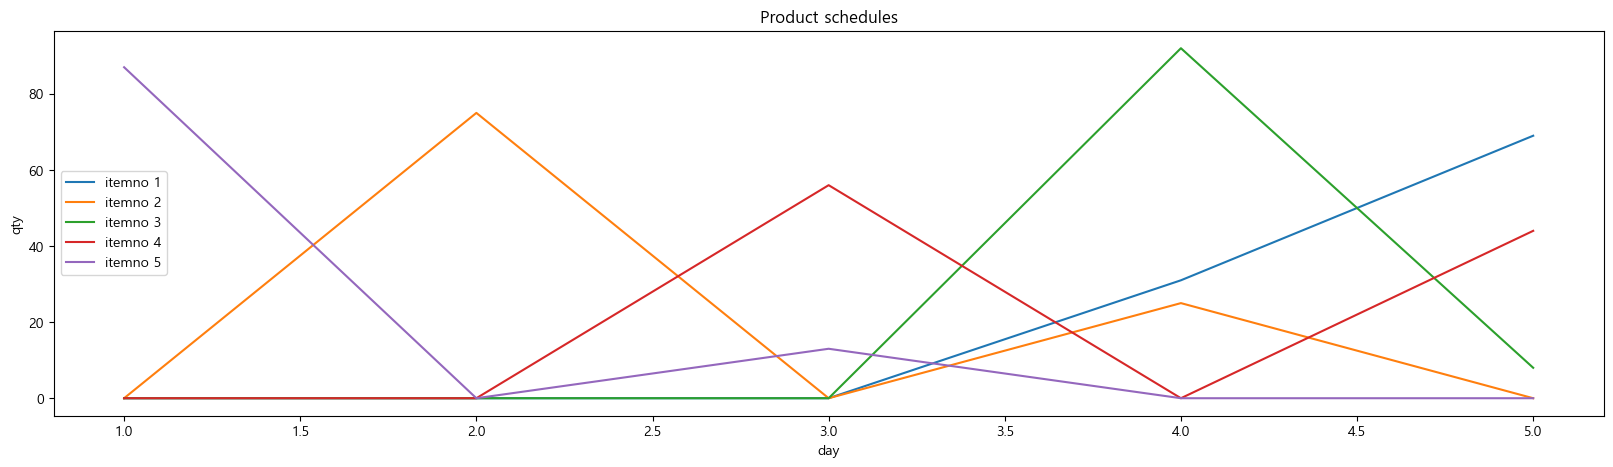

In [175]:
from cProfile import label
plt.figure(figsize=(20, 5))
plt.title(f'Product schedules')
for i in list(demand.keys()):
    df_result = plot_df[plot_df['itemno']==i]
    plt.xlabel('day')
    plt.ylabel('qty')
    plt.plot(df_result['day'], df_result['qty'], label=f'itemno {i}')
plt.legend()
plt.show()

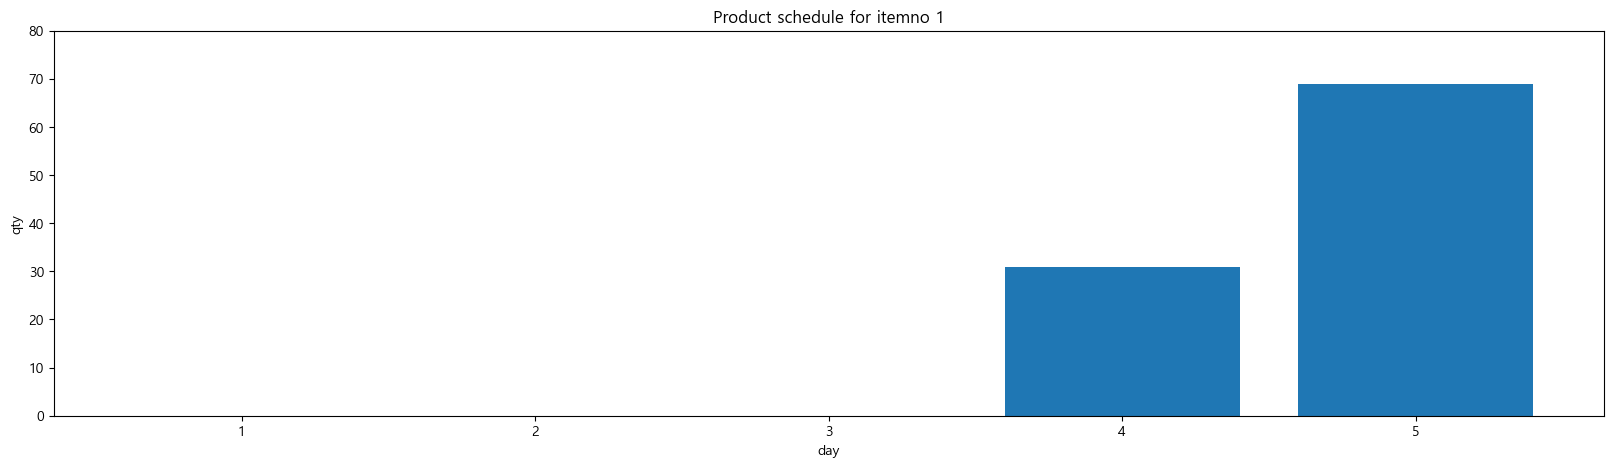

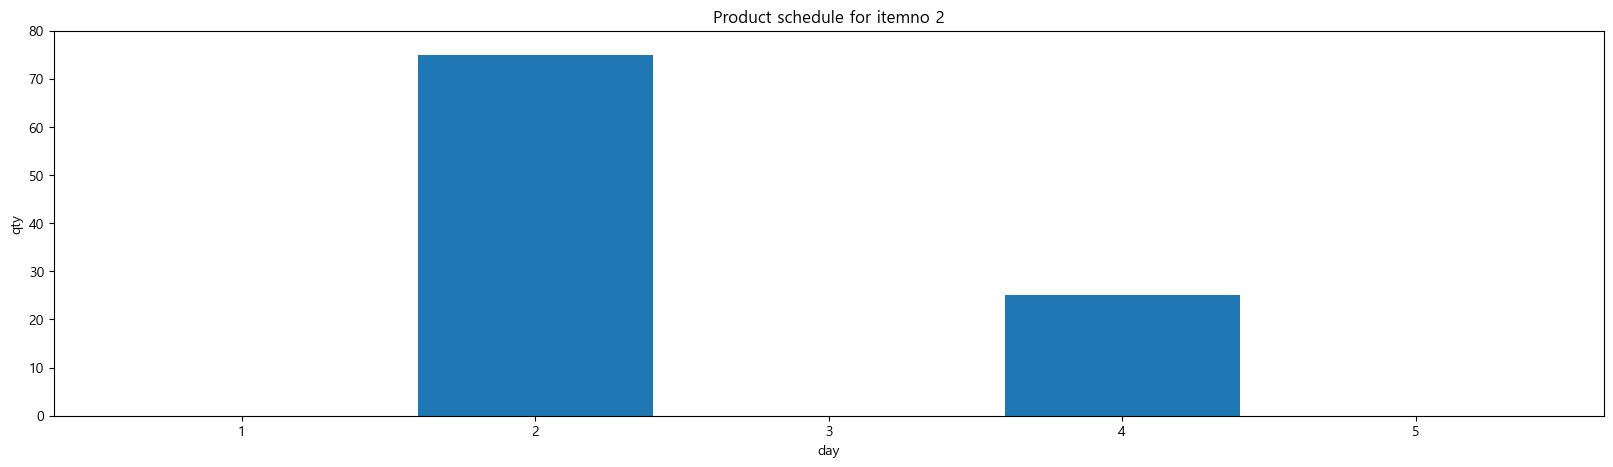

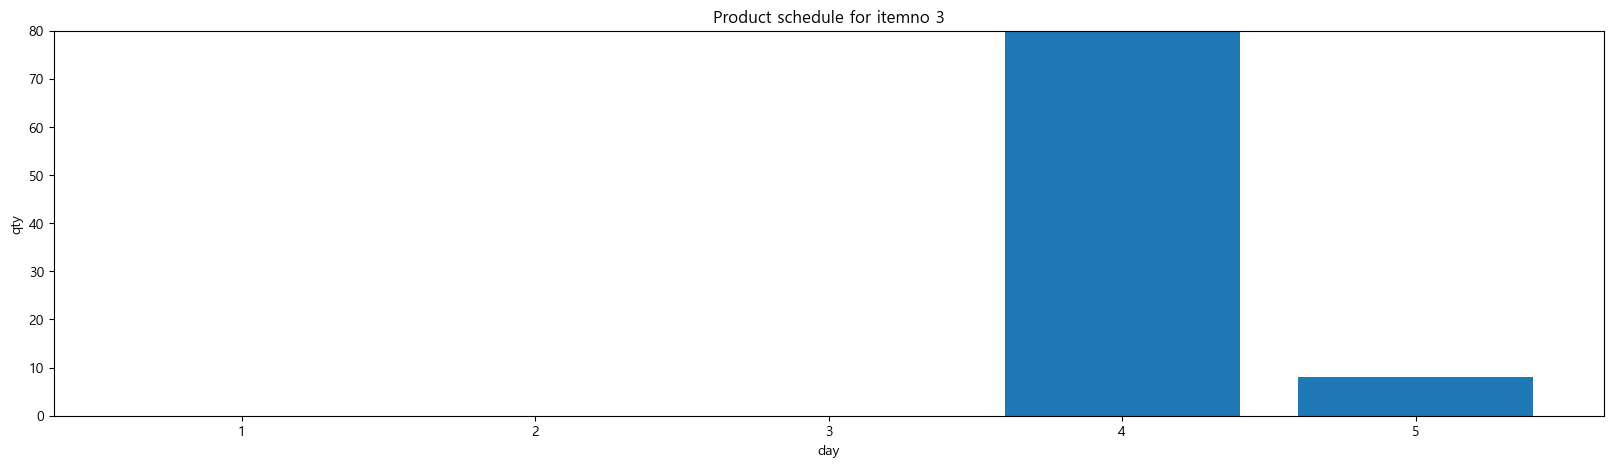

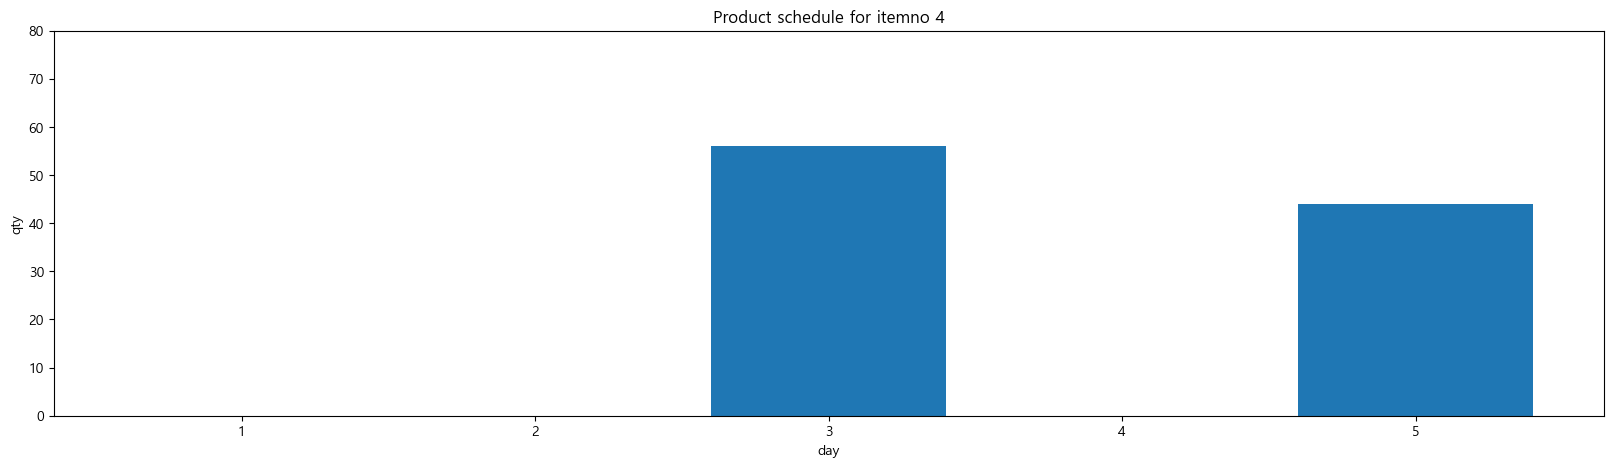

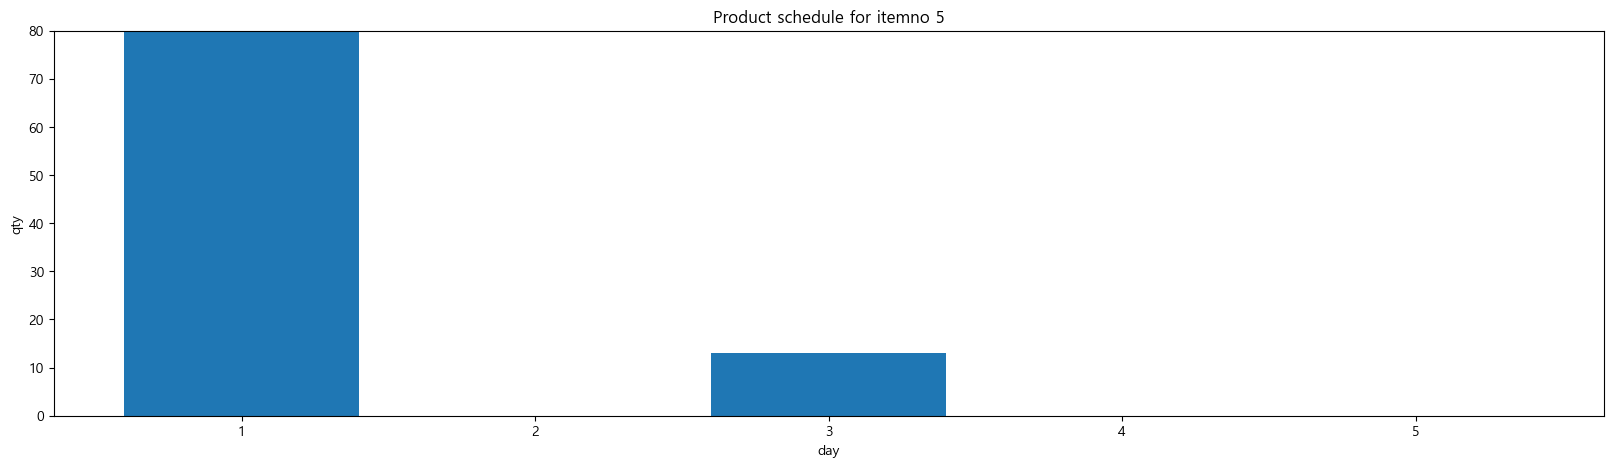

In [176]:
for i in list(demand.keys()):
    df_result = plot_df[plot_df['itemno']==i]
    plt.figure(figsize=(20, 5))
    plt.xlabel('day')
    plt.ylabel('qty')
    plt.title(f'Product schedule for itemno {i}')
    plt.bar(df_result['day'], df_result['qty'])
    plt.ylim(ymin=0, ymax=80)
    plt.show()

In [177]:
demand

{1: 100, 2: 100, 3: 100, 4: 100, 5: 100}

In [178]:
# 하루에 균일하게 만드는 경우
total_current_not_opt =0
for i in list(demand.keys()):
    for m in M:
        # 하루에 설비별 1~5품목 20개씩 생산할때의 전류 소모값의 합
        total_current_not_opt += ciqm[1,20,m] 
# 최전화 전 하루 전력소모량 * 5         
total_current_not_opt = total_current_not_opt*5 
# 최적화 전 - 최적화 후
save_current = total_current_not_opt-model.objective_value
print(f'최적화 하지 않은 생산 계획의 전류량: {round(total_current_not_opt, 2)} [A]')
print(f'자원 최적화 생산 계획의 전류량: {round(model.objective_value, 2)} [A]')
print(f'전류 감축량: {round(save_current, 2)} [A]')
print(f'전류 감축비율: {round(save_current/total_current_not_opt, 2)*100}%')

최적화 하지 않은 생산 계획의 전류량: 166.86 [A]
자원 최적화 생산 계획의 전류량: 97.35 [A]
전류 감축량: 69.51 [A]
전류 감축비율: 42.0%
